In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Loading Training and Test data sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Number of Classes
Ntr = x_train.shape[0]      # Number of Training examples
Nte = x_test.shape[0]       # Number of Testing examples
Din = 3072                  # CIFAR10 (Size of an example)

# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0

# Subtract the means of images to make the network less sensitive to differing background and lightening conditions.
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

# Obtaining a binary numpy array from y_train and y_test
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Reshape image arrays from 32 x 32 x 3 into 1 x  3072
x_train = np.reshape(x_train,(Ntr,Din)).astype('float32')
x_test = np.reshape(x_test,(Nte,Din)).astype('float32')

170500096/170498071 [==============================] - 2s 0us/step
x_train:  (50000, 32, 32, 3)


In [3]:
H = 200                               # Number of hidden nodes
std=1.6e-5                              # Standard deviation
w1 = std*np.random.randn(Din, H)      # Weights 1 matrix
w2 = std*np.random.randn(H, K)        # Weights 2 matrix
b1 = np.zeros(H)                      # Bias 1 vector
b2 = np.zeros(K)                      # Bias 2 vector
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

batch_size = Ntr                    # Batch size

iterations = 300                    # Number of iterations to run Gradient Descent (For this case it equals to 300 epochs)
alpha = 1.5e-2                        # Learning Rate
alpha_decay= 0.999                  # Decay learning rate for convergence
Lambda = 5e-6                       # Regularization rate

loss_history = []                   # Loss history
train_acc_history = []              # Traing accuracy history

# Random Generator
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    h = 1.0/(1.0+np.exp(-(x.dot(w1) + b1)))   # Sigmoid
    y_pred = h.dot(w2) + b2
    loss = (1./batch_size)*(np.square(y_pred - y).sum()) + Lambda * (np.sum(w1 * w1) + np.sum(w1 * w1))
    loss_history.append(loss)

    # Printing Loss in each 10 iterations
    if t % 10 == 0:
        print('iteration %d / %d: loss %f ' %(t, iterations, loss))

    # Backward pass
    dy_pred = (1./batch_size)*2.0*(y_pred - y)              # PD of loss w.r.t. y_pred
    dw2 = h.T.dot(dy_pred) + Lambda * w2                    # PD of loss w.r.t. w2
    db2 = dy_pred.sum(axis = 0)                             # PD of loss w.r.t. b2
    dh = dy_pred.dot(w2.T)                                  # PD of loss w.r.t. h
    dw1 = x.T.dot(dh*h*(1-h)) + Lambda * w1                 # PD of loss w.r.t. w1 
    db1 = (dh*h*(1-h)).sum(axis = 0)                        # PD of loss w.r.t. b1
    w2 -= alpha * dw2                                       # Update weights 2
    b2 -= alpha * db2                                       # Update biases 2
    w1 -= alpha * dw1                                       # Update weights 1
    b1 -= alpha * db1                                       # Update biases 1
    alpha *= alpha_decay                                    # Decay learning rate

    # Appending Train accuracy to history
    h = 1.0/(1.0 + np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2) + b2
    train_acc = 1.0 - 1/(Ntr*9)*(np.abs(np.argmax(y_train, axis = 1) - np.argmax(y_pred, axis = 1))).sum()
    train_acc_history.append(train_acc)

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
iteration 0 / 300: loss 0.999986 
iteration 10 / 300: loss 0.860319 
iteration 20 / 300: loss 0.837341 
iteration 30 / 300: loss 0.827013 
iteration 40 / 300: loss 0.815906 
iteration 50 / 300: loss 0.803528 
iteration 60 / 300: loss 0.809739 
iteration 70 / 300: loss 0.790348 
iteration 80 / 300: loss 0.782884 
iteration 90 / 300: loss 0.784273 
iteration 100 / 300: loss 0.791114 
iteration 110 / 300: loss 0.777094 
iteration 120 / 300: loss 0.771480 
iteration 130 / 300: loss 0.775403 
iteration 140 / 300: loss 0.768695 
iteration 150 / 300: loss 0.760476 
iteration 160 / 300: loss 0.761918 
iteration 170 / 300: loss 0.760388 
iteration 180 / 300: loss 0.750336 
iteration 190 / 300: loss 0.755543 
iteration 200 / 300: loss 0.754354 
iteration 210 / 300: loss 0.762238 
iteration 220 / 300: loss 0.741648 
iteration 230 / 300: loss 0.743955 
iteration 240 / 300: loss 0.754908 
iteration 250 / 300: loss 0.744259 
iteration 260 / 300: los

train_acc =  0.78498
test_acc =  0.7681777777777777
test_loss =  0.7525615878854419


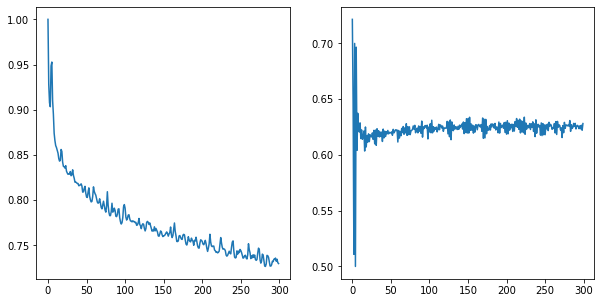

In [6]:
# Printing accuracies and losses

# History
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(loss_history)                # Training Loss History
ax[1].plot(train_acc_history)           # Training Accuracy History

# Calculating and Printing Training Accuracy
x_t = x_train
h = 1.0/(1.0+np.exp(-(x_t.dot(w1) + b1)))
y_pred = h.dot(w2) + b2
train_acc = 1.0 - 1/(Ntr*9)*(np.abs(np.argmax(y_train, axis = 1) - np.argmax(y_pred, axis = 1))).sum()
print("train_acc = ",train_acc)

# Calculating and Printing Testing Accuracy
x_t = x_test
h = 1.0/(1.0+np.exp(-(x_t.dot(w1) + b1)))
y_pred = h.dot(w2) + b2
test_acc =  1.0 - 1/(Nte*9)*(np.abs(np.argmax(y_test, axis = 1) - np.argmax(y_pred, axis = 1))).sum()
print("test_acc = ",test_acc)

# Testing Loss
test_loss = (1./Nte)*(np.square(y_pred - y_test).sum())
print("test_loss = ",test_loss)

Log (Expreiment with alpha)

alpha = 2e-3 --> tr_loss = 0.8021,te_loss = 0.8017, tr_acc = 0.7374, te_acc = 0.7393

alpha = 1e-3 --> tr_loss = 0.8297,te_loss = 0.8285, tr_acc = 0.7074, te_acc = 0.7099

alpha = 1.5e-2 --> tr_loss = 0.7325,te_loss = 0.7604, tr_acc = 0.7832, te_acc = 0.7664

alpha = 1e-2 --> tr_loss = 0.7464,te_loss = 0.7612, tr_acc = 0.7721, te_acc = 0.7597